**Melchizedek Ackah-Blay**

December 7, 2024

Car Market Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

*loading dataset*

In [2]:
df = pd.read_csv(r'/Users/melki/Desktop/car_dataset.csv')

*outputing sample data*

In [3]:
df.sample(4)

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
102718,102718,nissan,juke,gen-i-2010-2019,2011,148000,1598,Gasoline,Toruń,Kujawsko-pomorskie,33800
22366,22366,audi,q5,gen-fy-2017,2019,80000,1968,Diesel,Katowice,Śląskie,60000
57996,57996,mercedes-benz,a-klasa,gen-w177-2018,2019,62000,1332,Gasoline,Ociąż,Wielkopolskie,125000
73567,73567,toyota,rav4,gen-v-2018-rav4,2019,36000,1987,Gasoline,Pszów,Śląskie,125000


*looking at data shape*

In [4]:
df.shape

(117927, 11)

*looking at information from the data*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


*looking at the columns*

In [6]:
df.columns

Index(['Unnamed: 0', 'mark', 'model', 'generation_name', 'year', 'mileage',
       'vol_engine', 'fuel', 'city', 'province', 'price'],
      dtype='object')

*dropping models i will not use*

In [7]:
df.drop(columns = ['Unnamed: 0', 'generation_name'], inplace = True)

*looking for null values*

In [8]:
df.isna().sum()

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

*looking for duplicates*

In [9]:
df.duplicated().sum()

6761

*removing duplicates*

In [10]:
df.drop_duplicates(inplace = True)

*looing at new size*

In [11]:
df.shape

(111166, 9)

*analyzing car models*

In [12]:
car_models = df['model'].value_counts(normalize = True).sort_values(ascending = False)
car_models.head(10)

model
astra      0.028642
seria-3    0.026195
a4         0.026024
golf       0.022588
seria-5    0.021805
a6         0.021679
focus      0.019125
octavia    0.017955
passat     0.017784
mondeo     0.016597
Name: proportion, dtype: float64

*analyzing mileage*

In [13]:
print(f"the average mileage of the cars is {df['mileage'].mean()}")
print(f"the highest mileage is {df['mileage'].max()}")
print(f"the lowest mileage is {df['mileage'].min()}")

the average mileage of the cars is 141818.02698666858
the highest mileage is 2800000
the lowest mileage is 0


*analyzing year of the cars*

In [14]:
print(f"the average model year of the cars is {df['year'].mean()}")
print(f"the oldest model year is {df['year'].min()} years")
print(f"the newest model year is {df['year'].max()} years")

the average model year of the cars is 2012.8836064983898
the oldest model year is 1945 years
the newest model year is 2022 years


*analyzing prices by mark*

In [15]:
price_by_mark = df.groupby('mark')['price'].mean().sort_values(ascending = False)
price_by_mark.head(10)

mark
mercedes-benz    135598.585963
bmw              121183.286793
audi             105392.749011
volvo             92472.250599
mini              71536.833643
alfa-romeo        65794.752187
volkswagen        61870.866546
skoda             61279.840091
kia               58181.175942
mazda             56388.569801
Name: price, dtype: float64

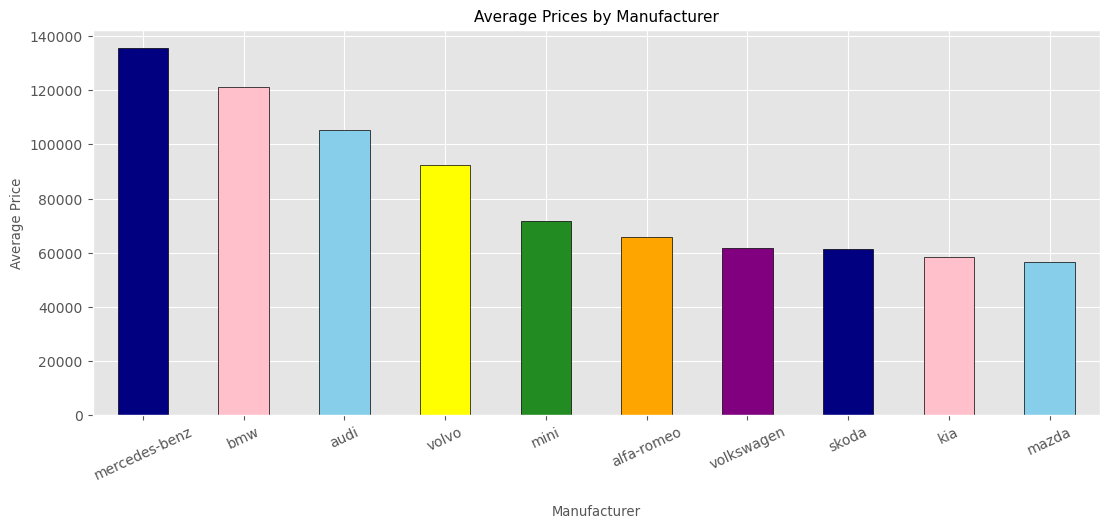

In [16]:
plt.figure(figsize = (13, 5))
price_by_mark.head(10).plot(kind = 'bar', color = ['navy', 'pink', 'skyblue', 'yellow', 'forestgreen', 'orange', 'purple'], edgecolor = 'black')
plt.title('Average Prices by Manufacturer', fontsize = 11)
plt.xlabel('\nManufacturer', fontsize = 9.5)
plt.xticks(rotation = 25)
plt.ylabel('Average Price', fontsize = 9.5)
plt.show()

*analyzing prices by year*

In [17]:
price_by_year = df.groupby('year')['price'].mean().sort_values(ascending = False)
price_by_year.head(10)

year
1968    369900.000000
2022    204310.590811
2021    198880.489540
2020    170343.388906
1952    149900.000000
1966    134414.285714
1964    129450.000000
1967    127225.000000
2019    125172.415394
1965    119900.000000
Name: price, dtype: float64

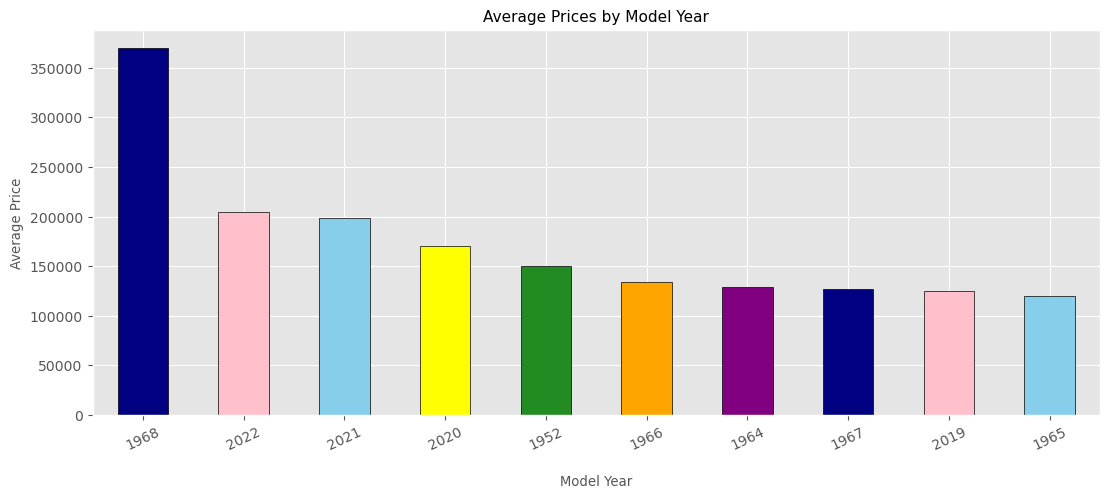

In [18]:
plt.figure(figsize = (13, 5))
price_by_year.head(10).plot(kind = 'bar', color = ['navy', 'pink', 'skyblue', 'yellow', 'forestgreen', 'orange', 'purple'], edgecolor = 'black')
plt.title('Average Prices by Model Year', fontsize = 11)
plt.xlabel('\nModel Year', fontsize = 9.5)
plt.xticks(rotation = 25)
plt.ylabel('Average Price', fontsize = 9.5)
plt.show()

*analyzing prices by fuel type*

In [19]:
price_by_fuel = df.groupby('fuel')['price'].mean().sort_values(ascending = False)
price_by_fuel.head(10)

fuel
Electric    191076.428951
Hybrid      159289.210872
Diesel       70620.197740
Gasoline     65157.168699
CNG          30796.476190
LPG          27307.425921
Name: price, dtype: float64

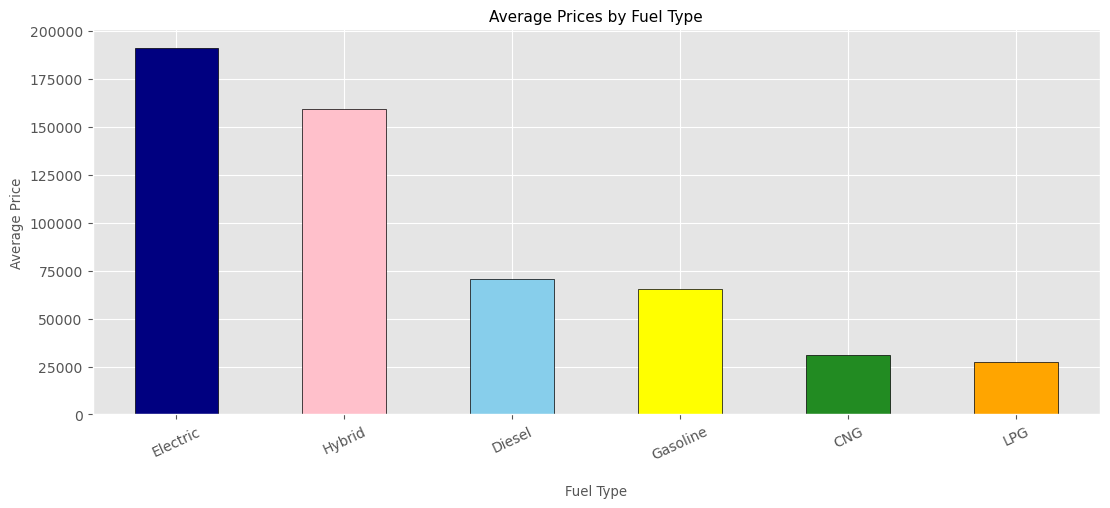

In [20]:
plt.figure(figsize = (13, 5))
price_by_fuel.head(10).plot(kind = 'bar', color = ['navy', 'pink', 'skyblue', 'yellow', 'forestgreen', 'orange', 'purple'], edgecolor = 'black')
plt.title('Average Prices by Fuel Type', fontsize = 11)
plt.xlabel('\nFuel Type', fontsize = 9.5)
plt.xticks(rotation = 25)
plt.ylabel('Average Price', fontsize = 9.5)
plt.show()

In [21]:
df['fuel']

0           Diesel
1           Diesel
2           Diesel
3           Diesel
4              CNG
            ...   
117250      Diesel
117251    Gasoline
117252      Diesel
117253    Gasoline
117254    Gasoline
Name: fuel, Length: 111166, dtype: object

*correlation analysis*

In [22]:
numerical_variables = df.select_dtypes(include = ['int', 'float'])
correlation_matrix = numerical_variables.corr()

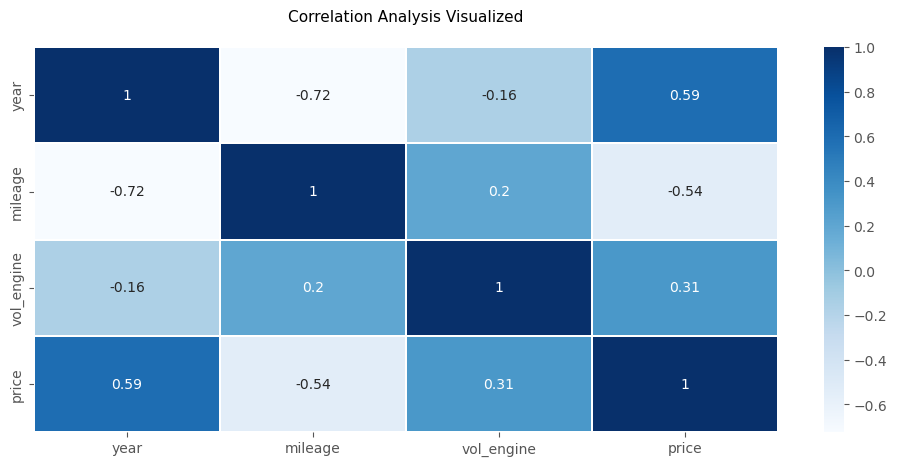

In [23]:
plt.figure(figsize = (12, 5))
sns.heatmap(correlation_matrix, annot = True, linewidth = 0.3, cmap = 'Blues')
plt.title('Correlation Analysis Visualized\n', fontsize = 11)
plt.show()

*distribution of car year*

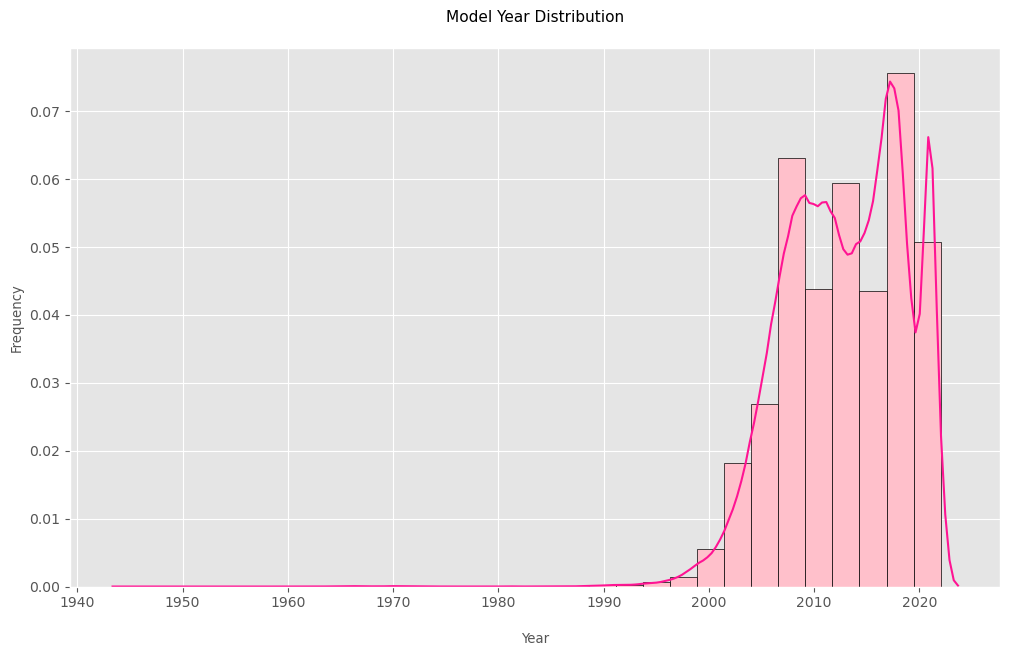

In [24]:
plt.figure(figsize = (12, 7))
plt.hist(df['year'], density = True, bins = 30, edgecolor = 'black', color = 'pink')
sns.kdeplot(df['year'], color = 'deeppink')
plt.title('Model Year Distribution\n', fontsize = 11)
plt.xlabel('\nYear', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*distribution of volume engine*

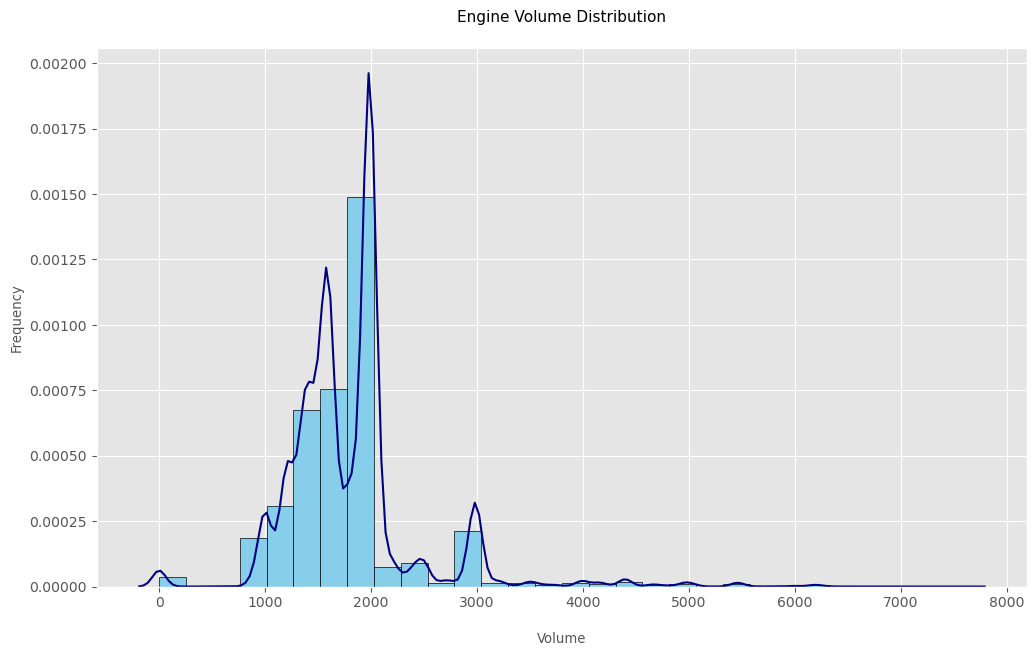

In [25]:
plt.figure(figsize = (12, 7))
plt.hist(df['vol_engine'], density = True, bins = 30, edgecolor = 'black', color = 'skyblue')
sns.kdeplot(df['vol_engine'], color = 'navy')
plt.title('Engine Volume Distribution\n', fontsize = 11)
plt.xlabel('\nVolume', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*distribution of mileage*

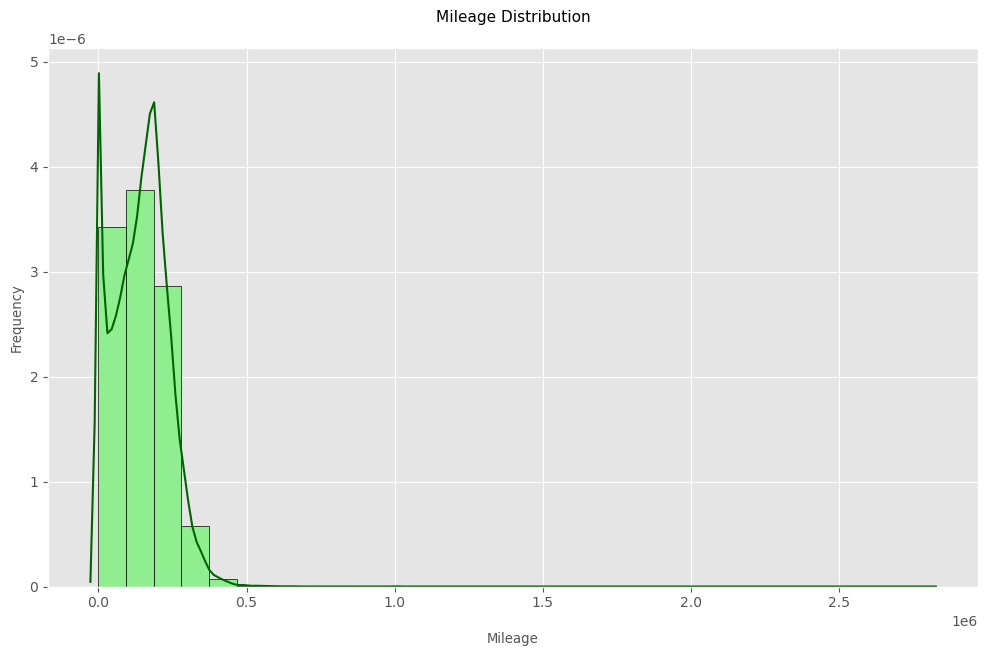

In [26]:
plt.figure(figsize = (12, 7))
plt.hist(df['mileage'], density = True, bins = 30, edgecolor = 'black', color = 'lightgreen')
sns.kdeplot(df['mileage'], color = 'darkgreen')
plt.title('Mileage Distribution\n', fontsize = 11)
plt.xlabel('\nMileage', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*mileage and price analysis*

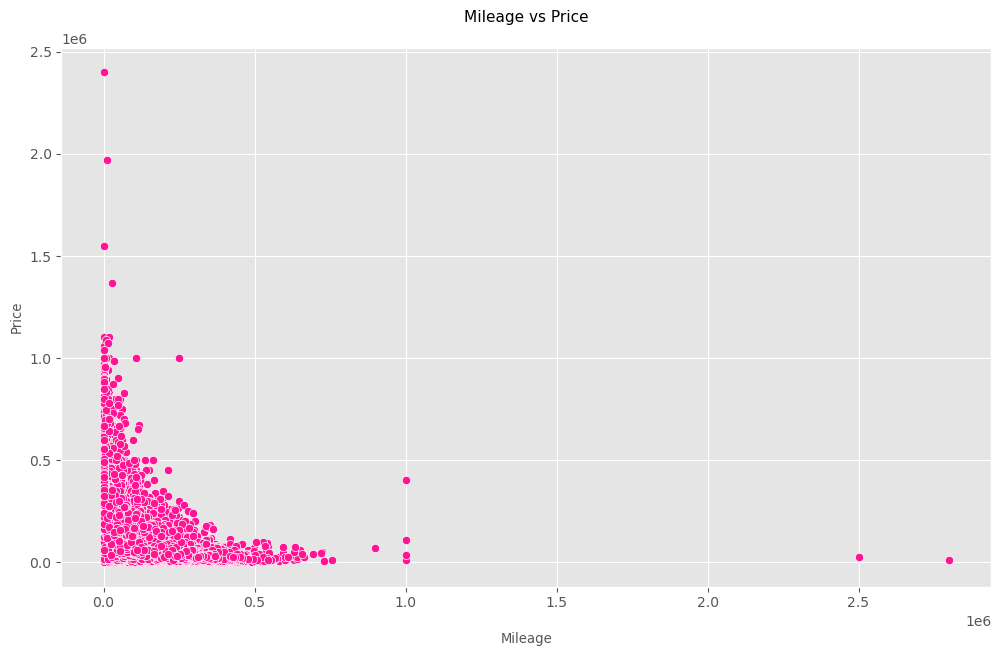

In [27]:
plt.figure(figsize = (12, 7))
sns.scatterplot(x = df['mileage'], y = df['price'], color = 'deeppink')
plt.title('Mileage vs Price\n', fontsize = 11)
plt.xlabel('\nMileage', fontsize = 9.5)
plt.ylabel('Price', fontsize = 9.5)
plt.show()

*engine volume and price analysis*

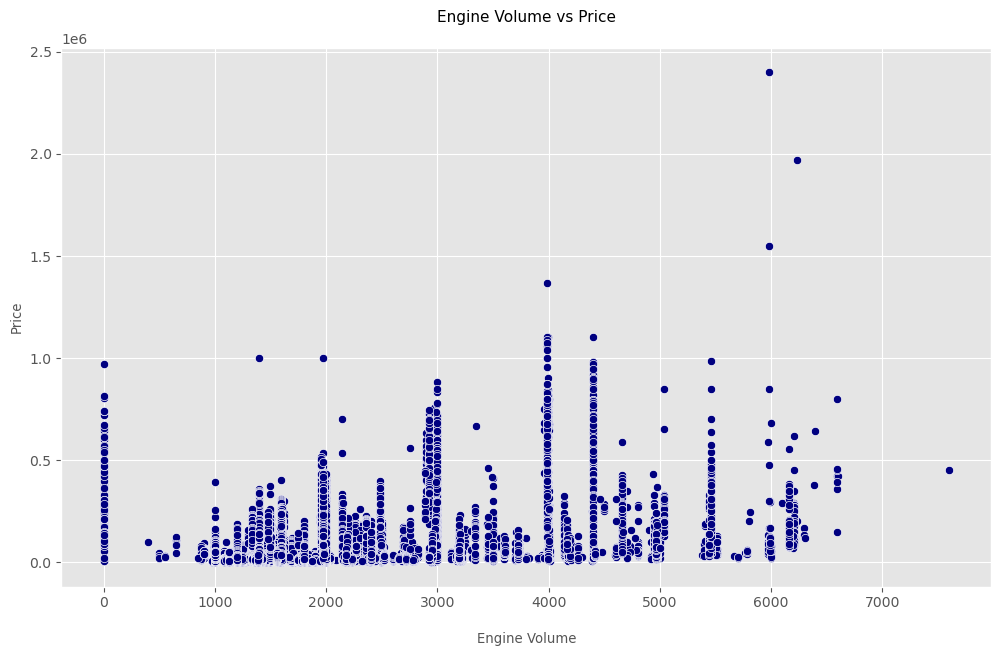

In [28]:
plt.figure(figsize = (12, 7))
sns.scatterplot(x = df['vol_engine'], y = df['price'], color = 'navy')
plt.title('Engine Volume vs Price\n', fontsize = 11)
plt.xlabel('\nEngine Volume', fontsize = 9.5)
plt.ylabel('Price', fontsize = 9.5)
plt.show()

*supplementary price analysis*

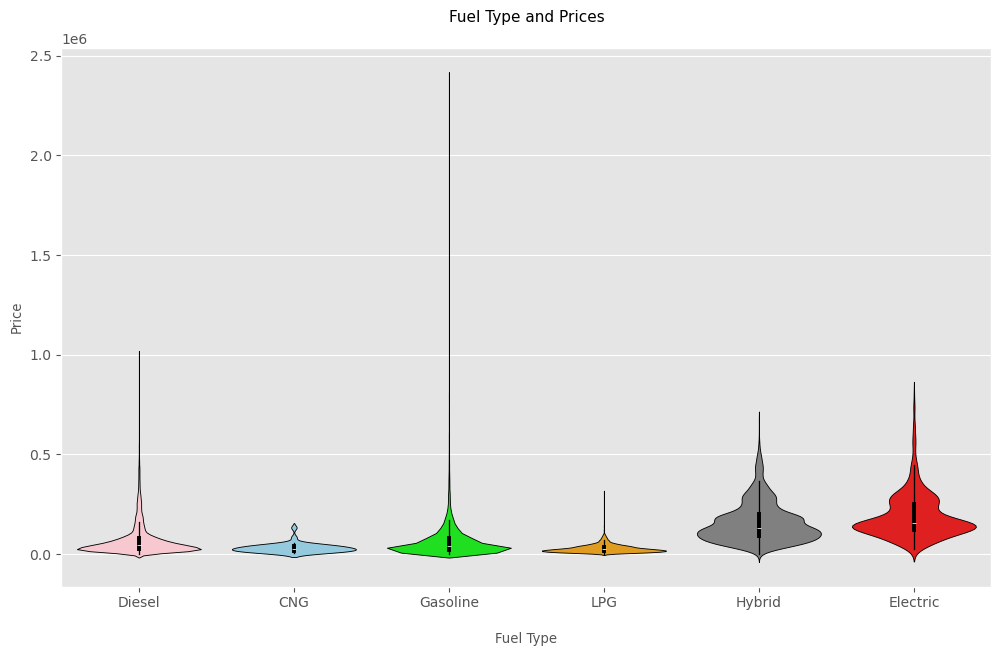

In [29]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (12, 7))
sns.violinplot(x = df['fuel'], y = df['price'], edgecolor = 'black', palette = ['pink', 'skyblue', 'lime', 'orange', 'gray', 'red'])
plt.title('Fuel Type and Prices\n', fontsize = 11)
plt.xlabel('\nFuel Type', fontsize = 9.5)
plt.ylabel('Price', fontsize = 9.5)
plt.show()

*most popular car models analysis*

In [30]:
popular_models = df['model'].value_counts().sort_values(ascending = False)
popular_models.head(10)

model
astra      3184
seria-3    2912
a4         2893
golf       2511
seria-5    2424
a6         2410
focus      2126
octavia    1996
passat     1977
mondeo     1845
Name: count, dtype: int64

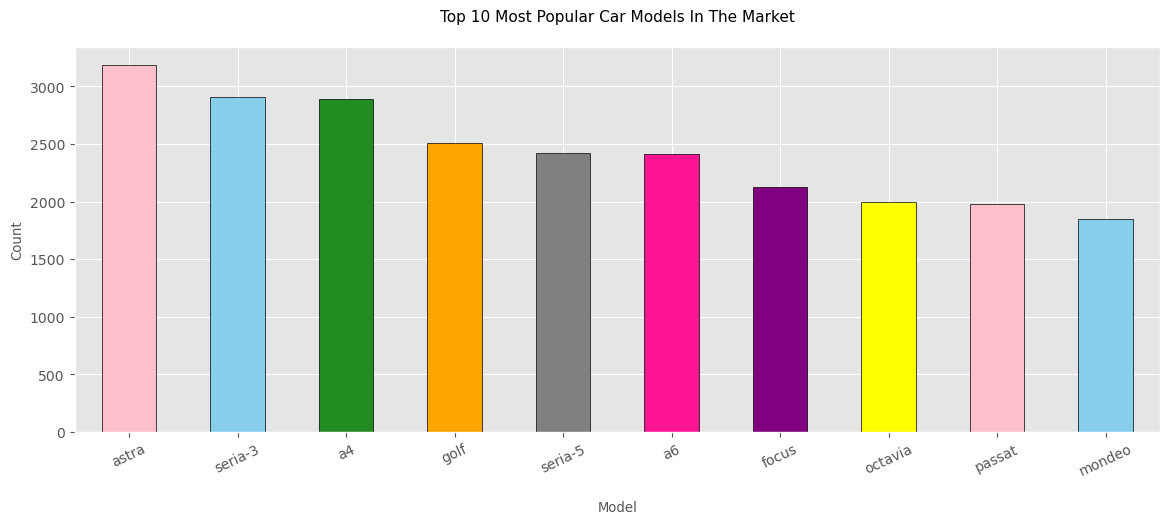

In [31]:
plt.figure(figsize = (14, 5))
popular_models.head(10).plot(kind = 'bar', edgecolor = 'black', color = ['pink', 'skyblue', 'forestgreen', 'orange', 'gray', 'deeppink', 'purple', 'yellow'])
plt.title('Top 10 Most Popular Car Models In The Market\n', fontsize = 11)
plt.xlabel('\nModel', fontsize = 9.5)
plt.xticks(rotation = 25)
plt.ylabel('Count', fontsize = 9.5)
plt.show()

*low mileage analysis*

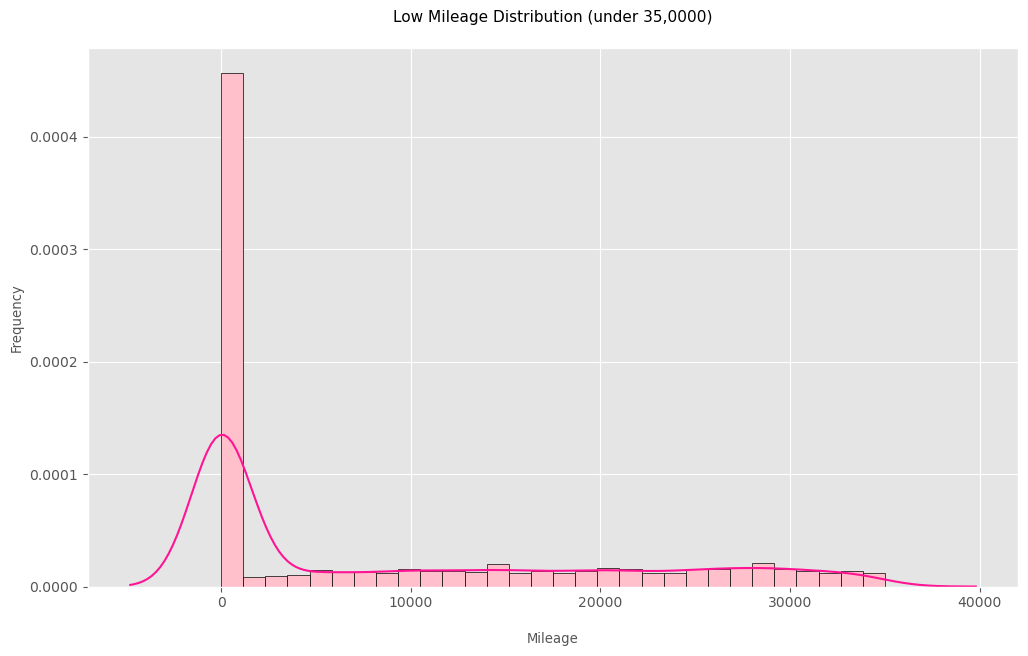

In [32]:
plt.figure(figsize = (12, 7))
low_mileage = df[df['mileage'] < 35000]
plt.hist(low_mileage['mileage'], bins = 30, edgecolor = 'black', color = 'pink', density = True)
sns.kdeplot(low_mileage['mileage'], color = 'deeppink')
plt.title('Low Mileage Distribution (under 35,0000)\n', fontsize = 11)
plt.xlabel('\nMileage', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*price analysis using province*

In [33]:
price_province = df.groupby('province')['price'].mean().sort_values(ascending = False)
price_province.head(10)

province
Niedersachsen               115000.000000
Moravian-Silesian Region     94938.970588
Pomorskie                    82275.801778
Śląskie                      79435.075333
Łódzkie                      73690.223456
Mazowieckie                  73049.495664
Opolskie                     70435.153846
Kujawsko-pomorskie           68294.812811
Podlaskie                    68122.441264
Małopolskie                  66041.445466
Name: price, dtype: float64

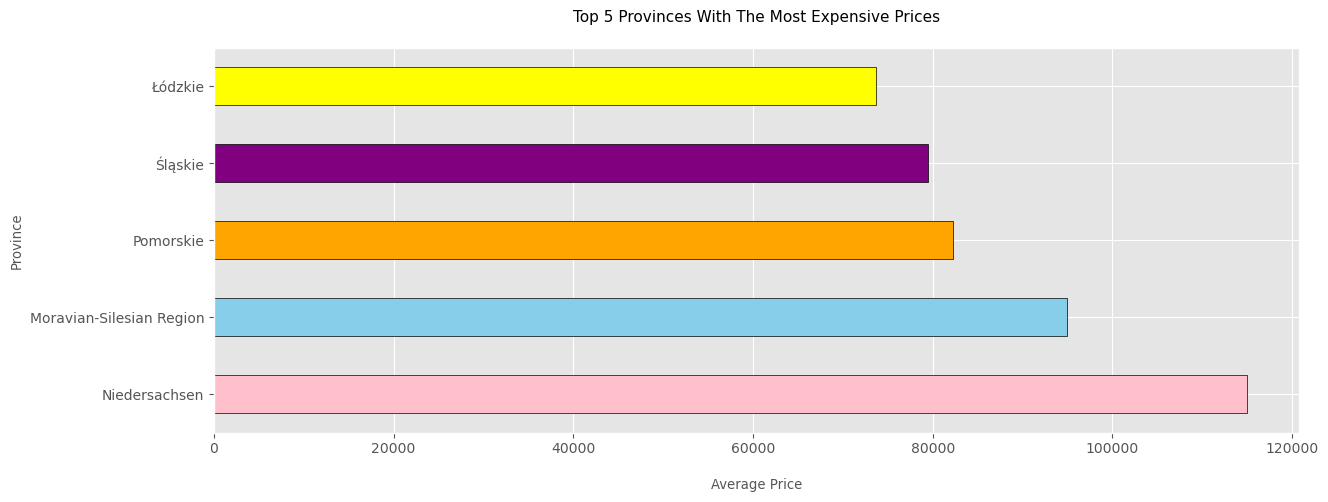

In [34]:
plt.figure(figsize = (14, 5))
price_province.head(5).plot(kind = 'barh', edgecolor = 'black', color = ['pink', 'skyblue', 'orange', 'purple', 'yellow'])
plt.title('Top 5 Provinces With The Most Expensive Prices\n', fontsize = 11)
plt.xlabel('\nAverage Price', fontsize = 9.5)
plt.ylabel('Province', fontsize = 9.5)
plt.show()

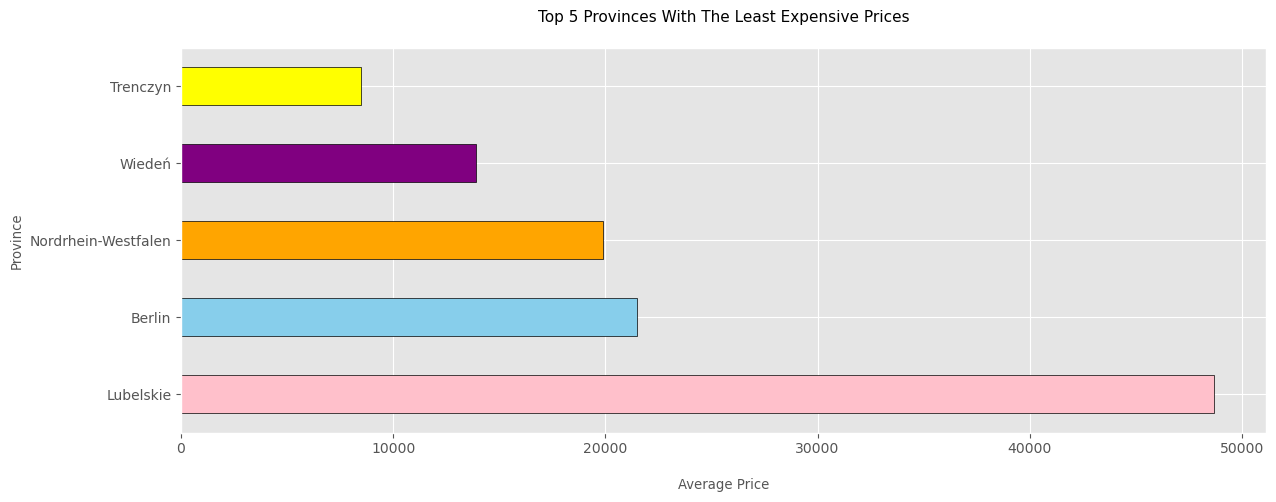

In [35]:
plt.figure(figsize = (14, 5))
price_province.tail(5).plot(kind = 'barh', edgecolor = 'black', color = ['pink', 'skyblue', 'orange', 'purple', 'yellow'])
plt.title('Top 5 Provinces With The Least Expensive Prices\n', fontsize = 11)
plt.xlabel('\nAverage Price', fontsize = 9.5)
plt.ylabel('Province', fontsize = 9.5)
plt.show()

*province and car model analysis*

In [36]:
province_cars = df.groupby('province')['model'].count().sort_values(ascending = False)
province_cars.head(10)

province
Mazowieckie           20871
Śląskie               15677
Wielkopolskie         13272
Małopolskie            9242
Dolnośląskie           8370
Łódzkie                7384
Pomorskie              7199
Kujawsko-pomorskie     5027
Lubelskie              4488
Zachodniopomorskie     3737
Name: model, dtype: int64

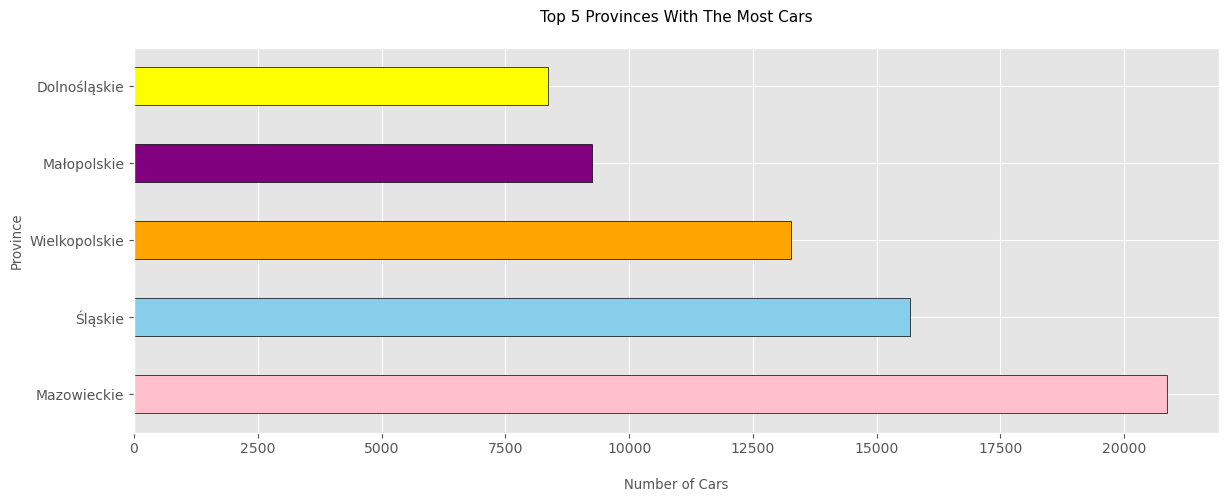

In [37]:
plt.figure(figsize = (14, 5))
province_cars.head(5).plot(kind = 'barh', edgecolor = 'black', color = ['pink', 'skyblue', 'orange', 'purple', 'yellow'])
plt.title('Top 5 Provinces With The Most Cars\n', fontsize = 11)
plt.xlabel('\nNumber of Cars', fontsize = 9.5)
plt.ylabel('Province', fontsize = 9.5)
plt.show()

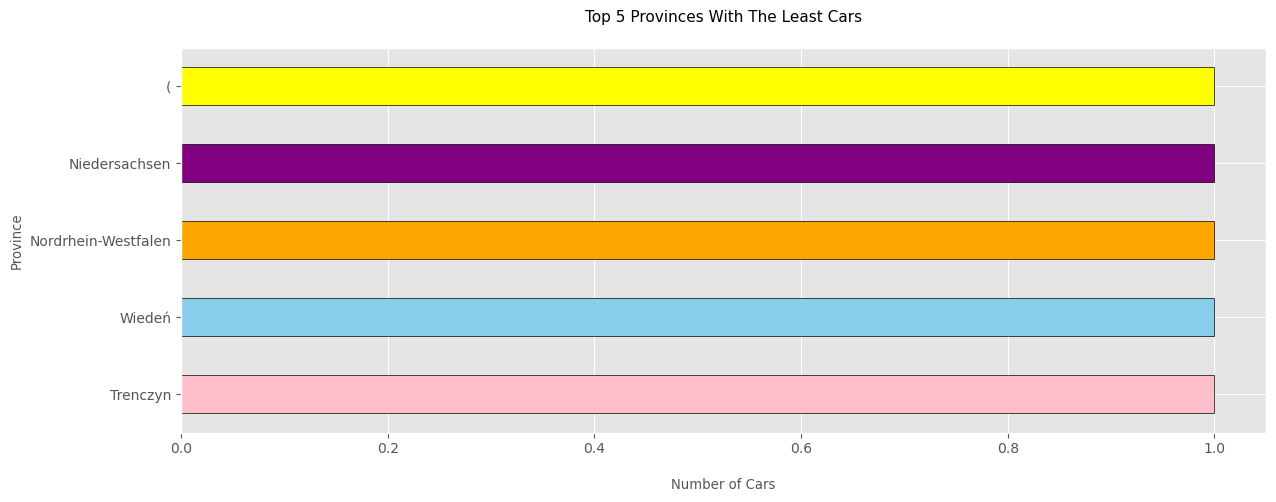

In [38]:
plt.figure(figsize = (14, 5))
province_cars.tail(5).plot(kind = 'barh', edgecolor = 'black', color = ['pink', 'skyblue', 'orange', 'purple', 'yellow'])
plt.title('Top 5 Provinces With The Least Cars\n', fontsize = 11)
plt.xlabel('\nNumber of Cars', fontsize = 9.5)
plt.ylabel('Province', fontsize = 9.5)
plt.show()

*mileage analysis by manufacturer and province*

In [39]:
mileage_pro_manu = df.groupby(['mark','province'])['mileage'].mean().sort_values(ascending = False).unstack()
mileage_pro_manu.head(5)

province,(,Berlin,Dolnośląskie,Kujawsko-pomorskie,Lubelskie,Lubuskie,Mazowieckie,Małopolskie,Moravian-Silesian Region,Niedersachsen,...,Podlaskie,Pomorskie,Trenczyn,Warmińsko-mazurskie,Wiedeń,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie
mark,,,,,,,,,,,,,,,,,,,,,
alfa-romeo,NaN,NaN,177537.688889,130814.485714,163404.125000,118556.833333,138224.543307,139114.526316,NaN,NaN,...,37215.000000,115350.555556,NaN,145326.750000,NaN,131409.761905,117257.555556,132334.885714,144187.476190,193253.727273
audi,NaN,177000.0,169743.047004,133081.720412,199817.152034,207048.656000,155743.528651,167766.460938,NaN,99999.0,...,159572.843882,120966.963002,NaN,187473.706485,180000.0,171807.797830,182249.775000,141248.632911,141757.521936,181313.364384
bmw,NaN,NaN,159482.234223,162810.803828,193993.005013,185174.366972,148987.360416,137768.335118,NaN,NaN,...,168326.889401,148325.332808,NaN,169757.125000,NaN,144289.405467,174737.173410,147930.415094,107642.991536,164580.367052
chevrolet,NaN,NaN,125837.770833,155565.066667,124454.217391,146303.277778,139739.621622,133729.709677,NaN,NaN,...,135346.357143,166139.928571,NaN,156262.352941,NaN,141965.509434,137779.724138,146372.339623,135759.948980,151089.071429
citroen,NaN,NaN,167906.806931,183288.033058,184220.170370,177332.120000,172498.970711,165059.400000,NaN,NaN,...,192650.791667,180655.150943,NaN,185200.694915,NaN,156748.872390,163818.979592,167013.122340,149545.405914,184060.880435


*price by fuel type and manufacturer*

In [40]:
price_manu_fuel = df.groupby(['mark', 'fuel'])['price'].mean().sort_values(ascending = False).unstack()
price_manu_fuel.head(4)

fuel,CNG,Diesel,Electric,Gasoline,Hybrid,LPG
mark,,,,,,
alfa-romeo,NaN,26460.347656,NaN,92664.543902,NaN,18444.400000
audi,91900.0,109290.006565,403804.688172,93532.788584,291275.954887,18254.003390
bmw,NaN,113219.239468,136625.494118,130234.566698,284609.683962,21262.779359
chevrolet,NaN,24286.471545,NaN,47907.954436,NaN,22620.848485


*fuel type distribution*

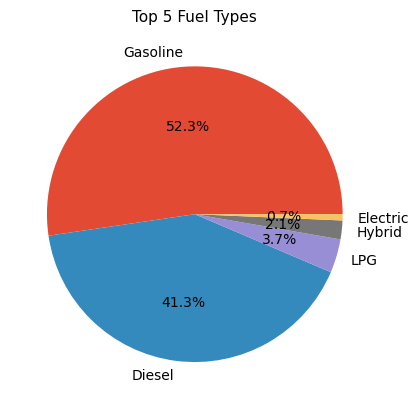

In [41]:
fuel_dist = df['fuel'].value_counts()
fuel_dist.head(5).plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Top 5 Fuel Types', fontsize = 11)
plt.ylabel('')
plt.show()

*manufacturer distribution*

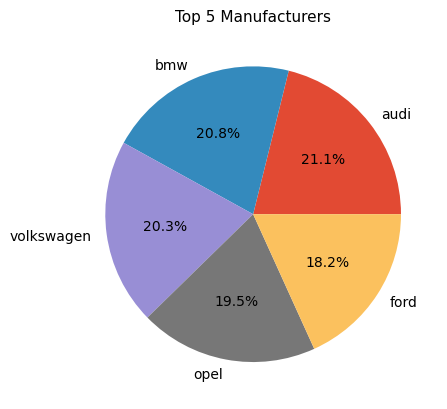

In [42]:
manu_dist = df['mark'].value_counts()
manu_dist.head(5).plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Top 5 Manufacturers', fontsize = 11)
plt.ylabel('')
plt.show()

*city analysis*

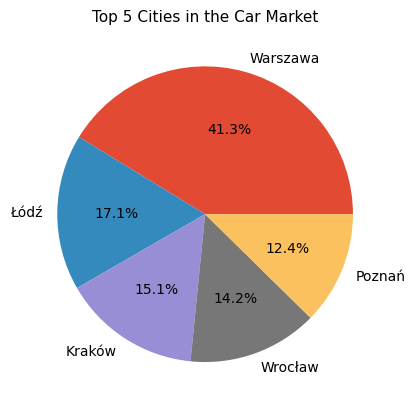

In [43]:
city_dist = df['city'].value_counts()
city_dist.head(5).plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Top 5 Cities in the Car Market', fontsize = 11)
plt.ylabel('')
plt.show()

*province analysis*

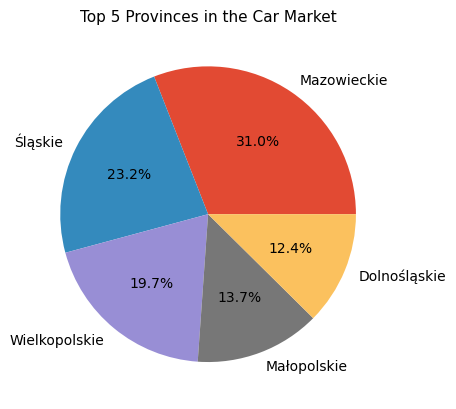

In [44]:
prov_dist = df['province'].value_counts()
prov_dist.head(5).plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Top 5 Provinces in the Car Market', fontsize = 11)
plt.ylabel('')
plt.show()

**FEATURE ENGINEERING**

In [45]:
x = df.drop(columns = ['price', 'model', 'city', 'province'])
x.head()

y = df['price']

In [46]:
x.sample(4)

,mark,year,mileage,vol_engine,fuel
6624,opel,2011,184000,2792,Gasoline
77215,skoda,2008,290800,1896,Diesel
612,opel,2008,158000,1364,Gasoline
37372,volkswagen,2010,166693,1197,Gasoline


*encoding and scaling  x variables*

In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

In [48]:
x['mark'] = encoder.fit_transform(x['mark'])
x['fuel'] = encoder.fit_transform(x['fuel'])

*splitting data into train and test data*

In [49]:
from sklearn.model_selection import train_test_split as t
x_train, x_test, y_train, y_test = t(x, y, test_size = 0.2, random_state = 1)

*scaling x train and x test*

In [50]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

*function to evaluate model performance*

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
def evaluator(pred):
    print(f'mean squared error: {round(mean_squared_error(y_test, pred),2)}')
    print(f'root mean squared error: {round(math.sqrt(mean_squared_error(y_test, pred)), 2)}')
    print(f'mean absolute error: {round(mean_absolute_error(y_test, pred),2)}')
    print(f'r squared: {round(r2_score(y_test, pred),2)}')

#
*training first model: **linear regression***

In [52]:
from sklearn.linear_model import LinearRegression
lin_mod = LinearRegression()
lin_mod.fit(x_train_scaled, y_train)

LinearRegression()

*making predictions and evaluating*

In [53]:
lin_pred = lin_mod.predict(x_test_scaled)
evaluator(lin_pred)

mean squared error: 3009345624.98
root mean squared error: 54857.5
mean absolute error: 32371.66
r squared: 0.58


#
*training second model: **support vector regressor***

In [54]:
from sklearn.svm import SVR
s_mod = SVR()

In [55]:
s_mod.fit(x_train_scaled, y_train)

SVR()

*making predictions and evaluating*

In [56]:
sv_pred = s_mod.predict(x_test_scaled)
evaluator(sv_pred)

mean squared error: 7295291248.5
root mean squared error: 85412.48
mean absolute error: 42500.19
r squared: -0.03


#
*training third model: **grid search random forest regressor***

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
p2 = {
    'n_estimators':[40, 50, 100, 200],
    'min_samples_split': [2, 4, 8]
}
gridRF = GridSearchCV(RandomForestRegressor(), param_grid = p2, cv = 3)
gridRF.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 4, 8],
                         'n_estimators': [40, 50, 100, 200]})

*making predictions and evaluating*

In [59]:
rf_pred = gridRF.predict(x_test_scaled)
evaluator(rf_pred)

mean squared error: 887283976.93
root mean squared error: 29787.31
mean absolute error: 14016.53
r squared: 0.88


*getting model's best paramaters*

In [64]:
gridRF.best_params_

{'min_samples_split': 8, 'n_estimators': 200}

#
*training fourth model: **grid search adaboost regressor***

In [62]:
from sklearn.ensemble import AdaBoostRegressor
p2 = {
    'n_estimators':[40, 50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1]
}
gridAD = GridSearchCV(AdaBoostRegressor(), param_grid = p2, cv = 3)
gridAD.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [40, 50, 100, 200]})

*making predictions and evaluating*

In [63]:
ada_pred = gridAD.predict(x_test_scaled)
evaluator(ada_pred)

mean squared error: 1863066727.47
root mean squared error: 43163.26
mean absolute error: 24766.11
r squared: 0.74


*getting model's best paramaters*

In [67]:
gridAD.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

#
*training fifth model: **grid search gradient boosting regressor***

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
p3 = {
    'n_estimators':[180, 200, 300],
    'learning_rate': [0.01, 0.02, 0.05],
    'min_samples_split':[1,2,5]
}
gridGBR = GridSearchCV(GradientBoostingRegressor(), param_grid = p3, cv = 3)
gridGBR.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.05],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [180, 200, 300]})

*making predictions and evaluating*

In [71]:
gbr_pred = gridGBR.predict(x_test_scaled)
evaluator(gbr_pred)

mean squared error: 896057099.51
root mean squared error: 29934.21
mean absolute error: 15373.34
r squared: 0.87


*getting model's best paramaters*

In [72]:
gridGBR.best_params_

{'learning_rate': 0.05, 'min_samples_split': 2, 'n_estimators': 300}

#
*training sixth model: **grid search xg boost regressor***

In [75]:
from xgboost import XGBRegressor
p4 = {
    'n_estimators':[300, 350, 400],
    'learning_rate': [0.05, 0.55, 0.06, 0.8],
}
gridXG = GridSearchCV(XGBRegressor(), param_grid = p4, cv = 3)
gridXG.fit(x_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.55, 0.06, 0.8],
                         'n_estimators': [300, 350, 400]})

*making predictions and evaluating*

In [76]:
xg_pred = gridXG.predict(x_test_scaled)
evaluator(xg_pred)

mean squared error: 882517532.77
root mean squared error: 29707.2
mean absolute error: 14063.13
r squared: 0.88


*getting model's best paramaters*

In [78]:
gridXG.best_params_

{'learning_rate': 0.06, 'n_estimators': 400}

#
*training seventh model: **grid search cat boost regressor***

In [79]:
from catboost import CatBoostRegressor
p5 = {
    'n_estimators':[400, 350, 500],
    'learning_rate': [0.06, 0.65, 0.7],
}
gridCB = GridSearchCV(CatBoostRegressor(), param_grid = p5, cv = 3)
gridCB.fit(x_train_scaled, y_train)

0:	learn: 79145.2873489	total: 60.9ms	remaining: 24.3s
1:	learn: 75716.2559873	total: 63.8ms	remaining: 12.7s
2:	learn: 72553.8544326	total: 66.3ms	remaining: 8.77s
3:	learn: 69590.8425390	total: 68.8ms	remaining: 6.81s
4:	learn: 66841.4480358	total: 71.3ms	remaining: 5.63s
5:	learn: 64261.4774018	total: 73.7ms	remaining: 4.84s
6:	learn: 61876.8838551	total: 76.4ms	remaining: 4.29s
7:	learn: 59674.6763841	total: 78.8ms	remaining: 3.86s
8:	learn: 57705.2804732	total: 81ms	remaining: 3.52s
9:	learn: 55827.0394523	total: 83.2ms	remaining: 3.25s
10:	learn: 54152.3091869	total: 85.6ms	remaining: 3.03s
11:	learn: 52488.8195634	total: 88ms	remaining: 2.84s
12:	learn: 50944.7704301	total: 90.3ms	remaining: 2.69s
13:	learn: 49579.3676517	total: 93ms	remaining: 2.56s
14:	learn: 48249.7226982	total: 95.3ms	remaining: 2.45s
15:	learn: 47085.4368851	total: 97.6ms	remaining: 2.34s
16:	learn: 45996.2112391	total: 100ms	remaining: 2.25s
17:	learn: 44844.5919172	total: 102ms	remaining: 2.17s
18:	learn:

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x15f9f0390>,
             param_grid={'learning_rate': [0.06, 0.65, 0.7],
                         'n_estimators': [400, 350, 500]})

*making predictions and evaluating*

In [80]:
cb_pred = gridCB.predict(x_test_scaled)
evaluator(cb_pred)

mean squared error: 775167332.71
root mean squared error: 27841.83
mean absolute error: 13750.22
r squared: 0.89


*analyzing best params of the model*

In [81]:
gridCB.best_params_

{'learning_rate': 0.06, 'n_estimators': 500}

**retraining model**

In [82]:
p6 = {
    'n_estimators':[500, 600, 700],
    'learning_rate': [0.06, 0.065, 0.068, 0.07],
}
gridCB2 = GridSearchCV(CatBoostRegressor(), param_grid = p6, cv = 3)
gridCB2.fit(x_train_scaled, y_train)

0:	learn: 79145.2873489	total: 4.96ms	remaining: 2.48s
1:	learn: 75716.2559873	total: 7.71ms	remaining: 1.92s
2:	learn: 72553.8544326	total: 11.3ms	remaining: 1.86s
3:	learn: 69590.8425390	total: 14.6ms	remaining: 1.82s
4:	learn: 66841.4480358	total: 18.3ms	remaining: 1.81s
5:	learn: 64261.4774018	total: 23.1ms	remaining: 1.9s
6:	learn: 61876.8838551	total: 26.4ms	remaining: 1.86s
7:	learn: 59674.6763841	total: 30.8ms	remaining: 1.89s
8:	learn: 57705.2804732	total: 34.7ms	remaining: 1.89s
9:	learn: 55827.0394523	total: 36.9ms	remaining: 1.81s
10:	learn: 54152.3091869	total: 39.2ms	remaining: 1.74s
11:	learn: 52488.8195634	total: 41.4ms	remaining: 1.68s
12:	learn: 50944.7704301	total: 43.7ms	remaining: 1.64s
13:	learn: 49579.3676517	total: 45.9ms	remaining: 1.59s
14:	learn: 48249.7226982	total: 48.6ms	remaining: 1.57s
15:	learn: 47085.4368851	total: 51.3ms	remaining: 1.55s
16:	learn: 45996.2112391	total: 53.6ms	remaining: 1.52s
17:	learn: 44844.5919172	total: 55.9ms	remaining: 1.5s
18:	

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x15bc36c90>,
             param_grid={'learning_rate': [0.06, 0.065, 0.068, 0.07],
                         'n_estimators': [500, 600, 700]})

*making predictions and evaluating*

In [83]:
cb2_pred = gridCB2.predict(x_test_scaled)
evaluator(cb2_pred)

mean squared error: 767350664.46
root mean squared error: 27701.1
mean absolute error: 13544.94
r squared: 0.89


## **CHOOSING BEST PERFORMING MODEL**

##### **Verdict**

The 2nd Categorical Boosting Regressor Model performs best across most metrics:
######


**Lowest MSE:** 767,350,664.46

**Lowest RMSE:** 27,701.10

**Lowest MAE:** 13,544.94

**High r²:** 0.89 (indicating strong variance explanation).
######
The 1st **CatBoost Regressor** is very close but slightly worse than CatBoost 2 in all metrics.


**XGBoost** and **Random Forest** are competitive but have slightly higher errors and lower R2R2.


**Gradient Boosting** and **AdaBoost** show declining performance, while **SVR** and **Linear Regression** are significantly worse.

######
#### **FEATURE IMPORTANCE OF THE BEST MODEL (2ND CATEGORICAL BOOSTING REGRESSOR)**

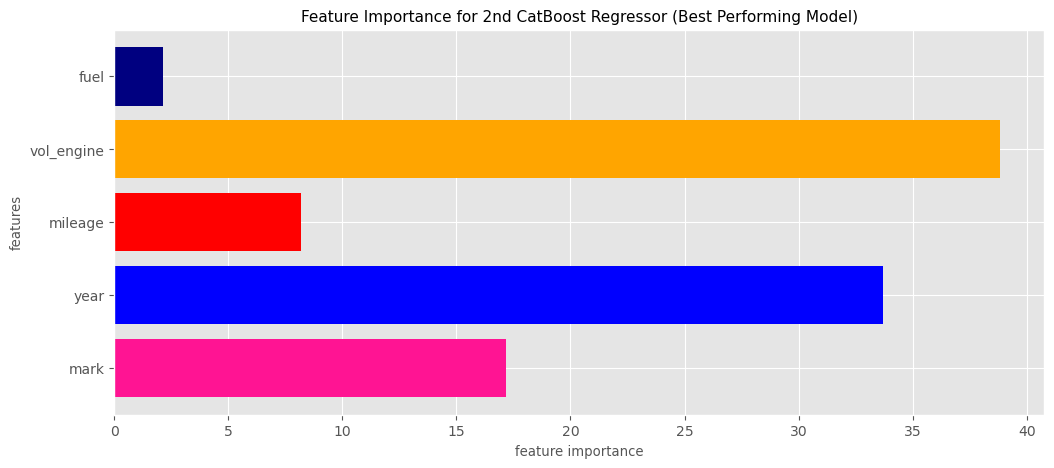

In [94]:
best_model = gridCB2.best_estimator_

feature_importances = best_model.get_feature_importance()

plt.figure(figsize=(12, 5))
plt.barh(range(len(feature_importances)), feature_importances, color = ['deeppink', 'blue', 'red', 'orange', 'navy'])
plt.yticks(range(len(feature_importances)), x_train.columns)  
plt.xlabel('feature importance', fontsize = 9.5)
plt.ylabel('features', fontsize = 9.5)
plt.title('Feature Importance for 2nd CatBoost Regressor (Best Performing Model)', fontsize = 11)
plt.show()

######
#### **CONCLUSION AND FINAL VERDICT**

Based on the feature importance plot, the most critical factors influencing car prices in the market are:

**Engine Volume:** The engine volume (vol_engine), represented by the yellow bar, has the highest feature importance score. This indicates that the size and power of the engine is a major determinant of a car's value. Consumers tend to place a high premium on engine specifications, as more powerful engines are generally more desirable but also more expensive to operate.

**Year of Manufacture:** The year the car was manufactured (year) is the second most important feature. The age and vintage of the vehicle are important considerations for buyers, as newer cars are often perceived as being in better condition and having more remaining useful life.

**Brand/Model:** The make and model of the car (mark) is the third most important factor. The brand, model, and reputation of the vehicle play a significant role in shaping its perceived value and appeal on the market.
These findings suggest that the critical elements influencing car prices are a combination of the vehicle's technical specifications, age, and brand identity. Manufacturers and dealers should focus on optimizing these key attributes to appeal to consumer preferences and remain competitive in the car market.

Let's explore these top factors in more detail:

**Engine Volume:**

The high feature importance of engine volume indicates that consumers place a premium on engine power and performance. Larger, more powerful engines are generally seen as more desirable, but also more expensive to operate in terms of fuel consumption and maintenance costs. Manufacturers may want to carefully balance engine specifications with fuel efficiency and affordability to meet varying consumer needs and preferences.

**Year of Manufacture:**

The year a car was made is an important determinant of its value, as newer vehicles are often perceived as being in better condition and having more remaining useful life. Older cars may also lack some of the latest safety, technology, and fuel efficiency features that modern buyers expect. Understanding the depreciation curve and market demand for different model years can help dealers price vehicles competitively.

**Brand/Model:**

The make and model of a car encompasses its brand identity, design, features, and reputation in the market. Established, premium brands tend to command higher prices, even for similar technical specifications. Dealers and manufacturers should focus on building strong brand equity and producing models that align with consumer tastes and preferences.

**Final say:**

By closely examining these top factors, auto industry players can gain valuable insights to guide strategic decisions around product development, pricing, and marketing. Understanding the key drivers of car values will help ensure they are offering the right mix of features, performance, and brand appeal to attract and retain customers in a competitive market.